In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from wordcloud import WordCloud # type: ignore

In [18]:
df = pd.read_csv("amazon reviews.csv")
print(df.head().to_string())

                     id                                                                                     name       asins   brand                                                                       categories                                                                                                                                                                                                                 keys manufacturer              reviews.date     reviews.dateAdded                                   reviews.dateSeen reviews.didPurchase reviews.doRecommend  reviews.id  reviews.numHelpful  reviews.rating                                                                                                                                         reviews.sourceURLs                                                                                                                                                                                                                           

C:\Users\nihar\AppData\Local\Temp\ipykernel_19660\3356112450.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("amazon reviews.csv")


DATA CLEANING

In [19]:
df["name"] = df["name"].fillna("None")
df["asins"] = df["asins"].fillna("None")
df["reviews.date"] = df["reviews.date"].fillna("None")
df["reviews.rating"] = df["reviews.rating"].fillna(0)
df["reviews.dateAdded"] = df["reviews.dateAdded"].fillna("None")
df["reviews.text"] = df["reviews.text"].fillna("No text")
df["reviews.title"] = df["reviews.title"].fillna("No title")
df["reviews.username"] = df["reviews.username"].fillna("No username")
df["reviews.numHelpful"] = df["reviews.numHelpful"].fillna(0)
df["reviews.didPurchase"] = df["reviews.didPurchase"].fillna("No record")
df["reviews.doRecommend"] = df["reviews.doRecommend"].fillna("FALSE")
# df = df.dropna(subset=['reviews.numHelpful','reviews.rating'],inplace=True)
df = df.drop(['reviews.id','reviews.userCity','reviews.userProvince'],axis=1)
# df = df.drop_duplicates()
print(df.isna().sum())


id                     0
name                   0
asins                  0
brand                  0
categories             0
keys                   0
manufacturer           0
reviews.date           0
reviews.dateAdded      0
reviews.dateSeen       0
reviews.didPurchase    0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
dtype: int64


In [20]:
print(df.describe().to_string())

       reviews.numHelpful  reviews.rating
count        34660.000000    34660.000000
mean             0.620629        4.580208
std             13.114759        0.748774
min              0.000000        0.000000
25%              0.000000        4.000000
50%              0.000000        5.000000
75%              0.000000        5.000000
max            814.000000        5.000000


In [21]:
shape = df.shape
print(f"Shape: {shape}")
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.\n\n")
print(df.info())

Shape: (34660, 18)
The dataset has 34660 rows and 18 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34660 non-null  object 
 1   name                 34660 non-null  object 
 2   asins                34660 non-null  object 
 3   brand                34660 non-null  object 
 4   categories           34660 non-null  object 
 5   keys                 34660 non-null  object 
 6   manufacturer         34660 non-null  object 
 7   reviews.date         34660 non-null  object 
 8   reviews.dateAdded    34660 non-null  object 
 9   reviews.dateSeen     34660 non-null  object 
 10  reviews.didPurchase  34660 non-null  object 
 11  reviews.doRecommend  34660 non-null  object 
 12  reviews.numHelpful   34660 non-null  float64
 13  reviews.rating       34660 non-null  float64
 14  reviews.sourceURLs   3

Top 15 Categories with the best average Rating.

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4.875'),
 Text(0, 0, '4.86275'),
 Text(0, 0, '4.83333'),
 Text(0, 0, '4.77236'),
 Text(0, 0, '4.72931'),
 Text(0, 0, '4.70728'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.6711'),
 Text(0, 0, '4.66667'),
 Text(0, 0, '4.61194'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.58861')]

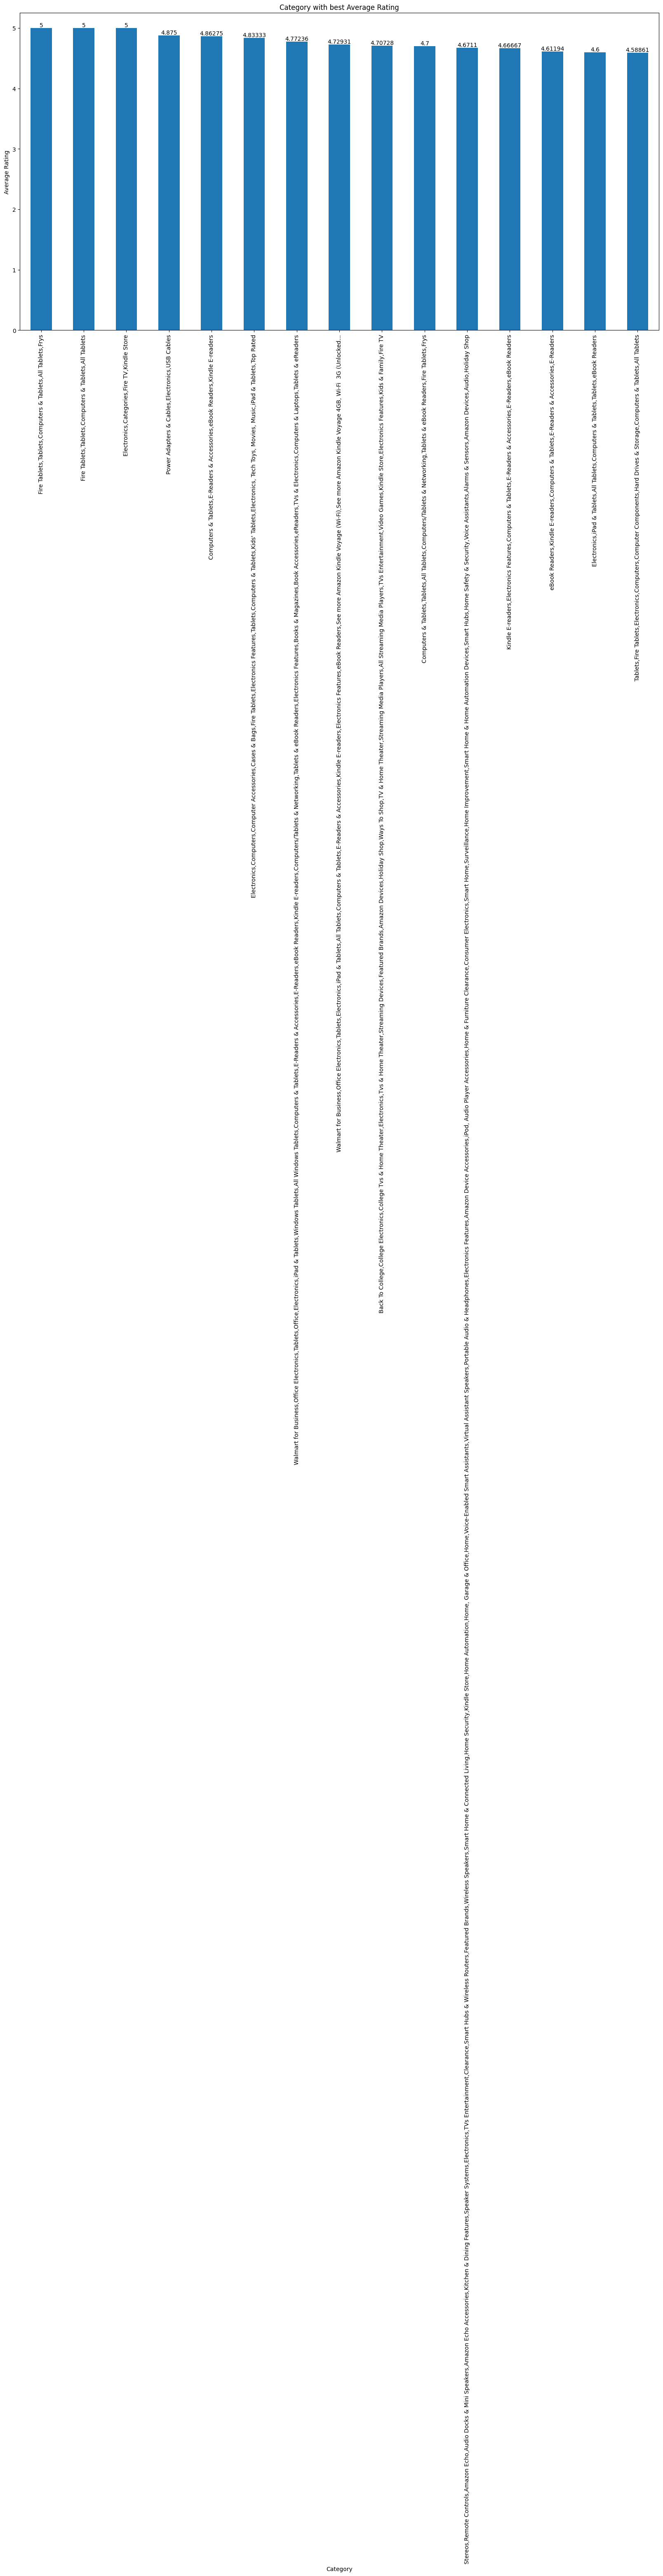

In [22]:
avg_rat = df.groupby('categories')['reviews.rating'].mean().sort_values(ascending=False).head(15)
ax = avg_rat.plot(kind='bar',title="Category with best Average Rating",xlabel='Category',ylabel='Average Rating',figsize=(20,10))
plt.xticks(rotation=90)
#print(avg_rat)
ax.bar_label(ax.containers[0])

In [23]:
df["sentiment"] = df["reviews.rating"].apply(lambda x:"Positive" if x==5 or x==4 else("Neutral" if x==3 else ("Negative")))
df['reviews.numHelpful'] = pd.to_numeric(df['reviews.numHelpful'])
df['reviews.rating'] = pd.to_numeric(df['reviews.rating'])

Do customers recommend this product or not

Text(0.5, 1.0, 'Do Recommend?')

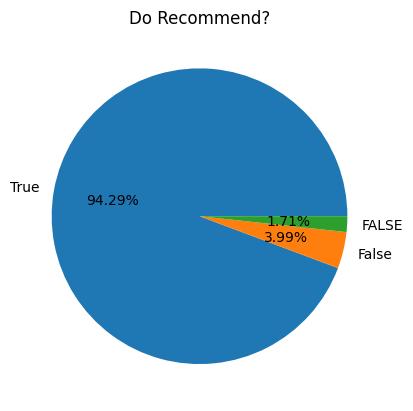

In [24]:
recommend = df['reviews.doRecommend'].value_counts()
plt.pie(recommend,labels=recommend.index,autopct="%0.2f%%")
plt.title('Do Recommend?')


The most recommended categories

[Text(0, 0, '10966'),
 Text(0, 0, '6619'),
 Text(0, 0, '5056'),
 Text(0, 0, '3176'),
 Text(0, 0, '2814'),
 Text(0, 0, '1699'),
 Text(0, 0, '1038'),
 Text(0, 0, '636'),
 Text(0, 0, '580'),
 Text(0, 0, '402'),
 Text(0, 0, '372'),
 Text(0, 0, '270'),
 Text(0, 0, '256'),
 Text(0, 0, '212'),
 Text(0, 0, '158')]

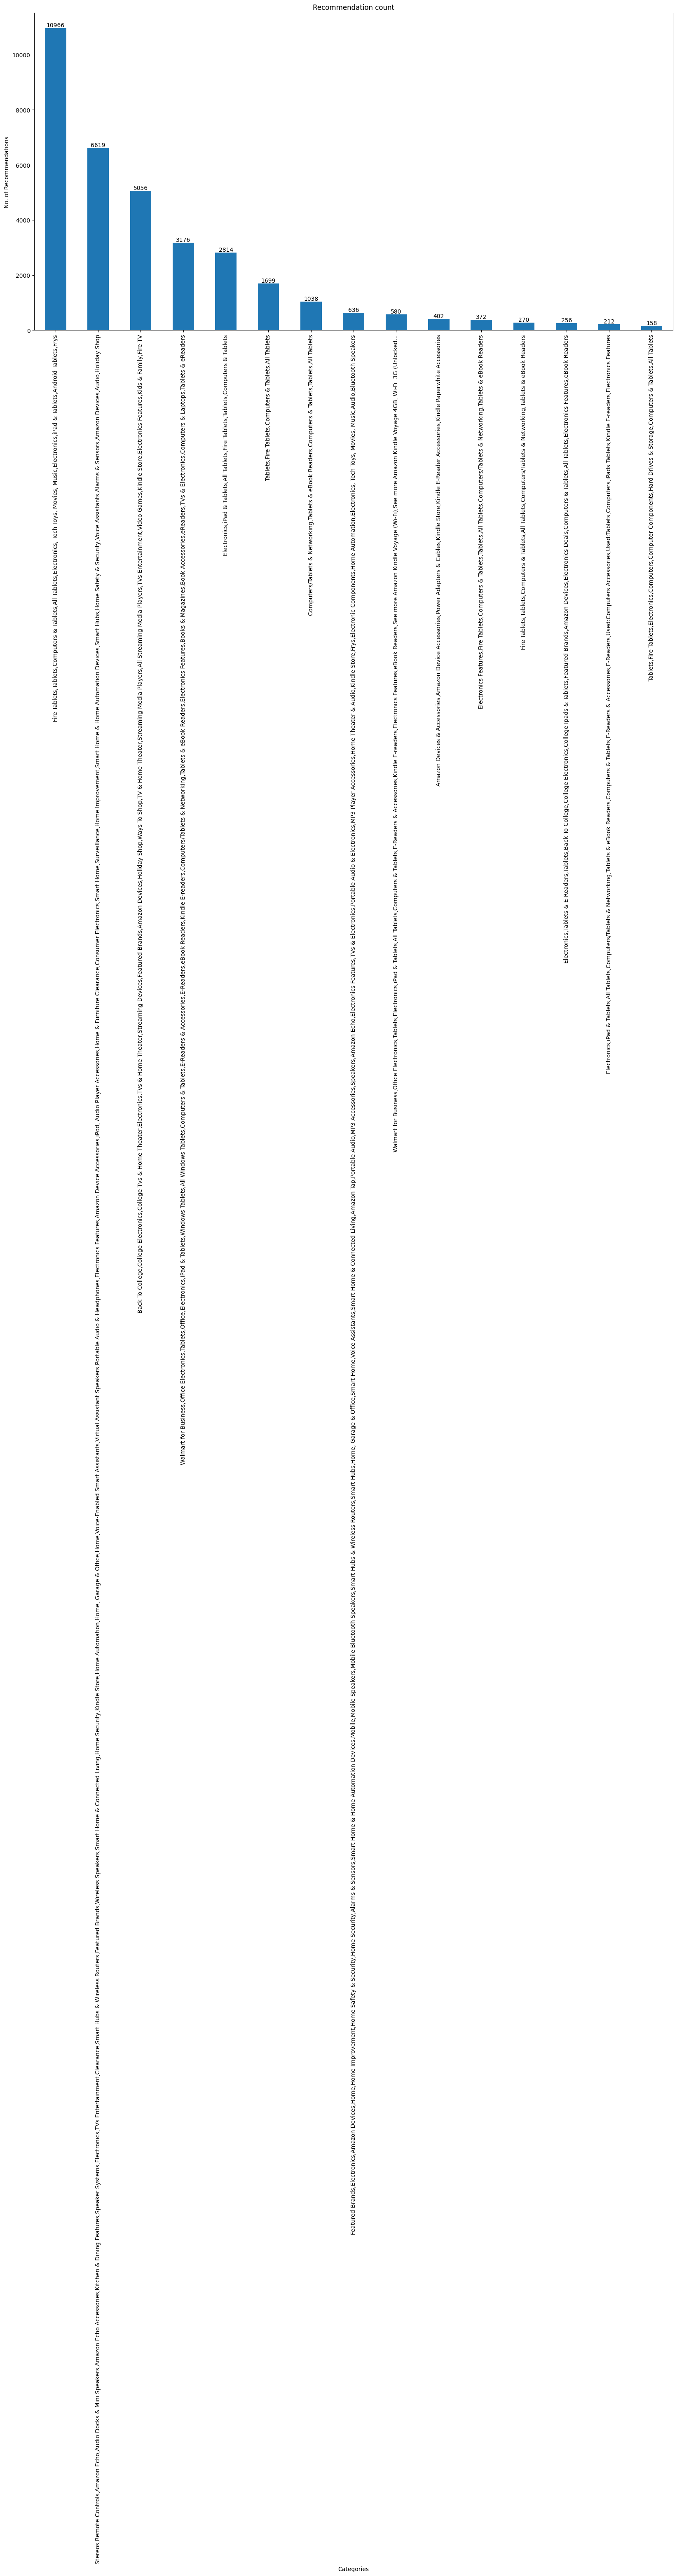

In [25]:
most_recommend = df.groupby('categories')['reviews.doRecommend'].apply(lambda x : (x=="True").count()).sort_values(ascending=False).head(15)
ax = most_recommend.plot(kind="bar",title="Recommendation count",xlabel="Categories",ylabel="No. of Recommendations",figsize=(20,10))
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

[Text(0, 0, '23775'),
 Text(0, 0, '8541'),
 Text(0, 0, '1499'),
 Text(0, 0, '410'),
 Text(0, 0, '402'),
 Text(0, 0, '33')]

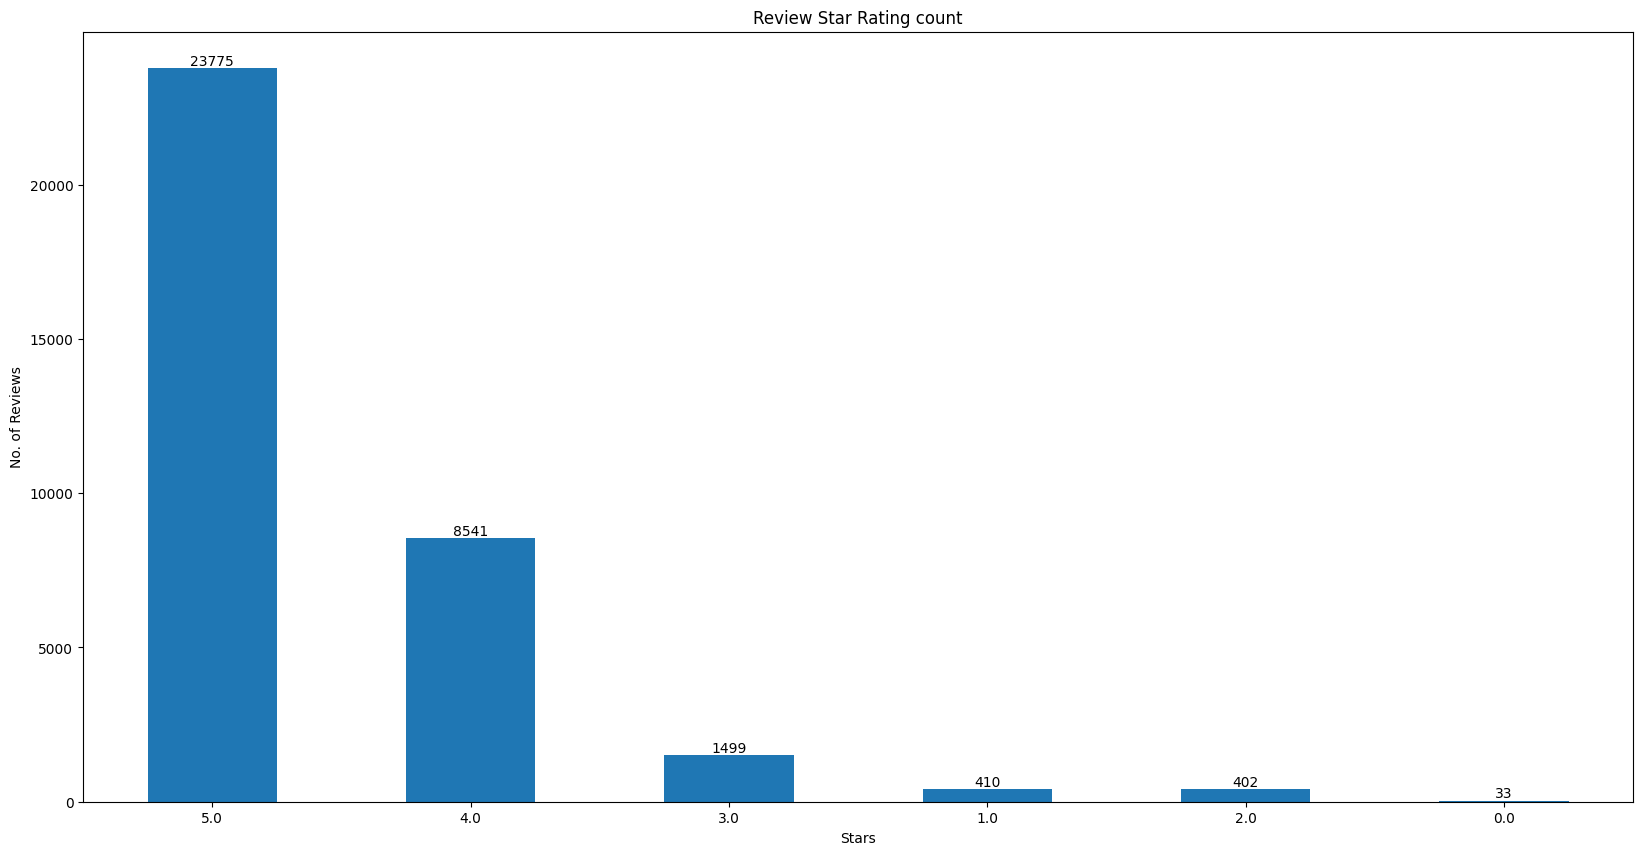

In [26]:
x = df["reviews.rating"].value_counts()
b = x.plot(kind="bar",title="Review Star Rating count",ylabel="No. of Reviews",xlabel="Stars",figsize=(20,10))
plt.xticks(rotation=0)
b.bar_label(b.containers[0])

SENTIMENT ANALYSIS
IF RATING >= 4 --> POSITIVE
   RATING == 3 --> NEUTRAL
   RATING < 3  --> NEGATIVE

[Text(0, 0, '32316'), Text(0, 0, '1499'), Text(0, 0, '845')]

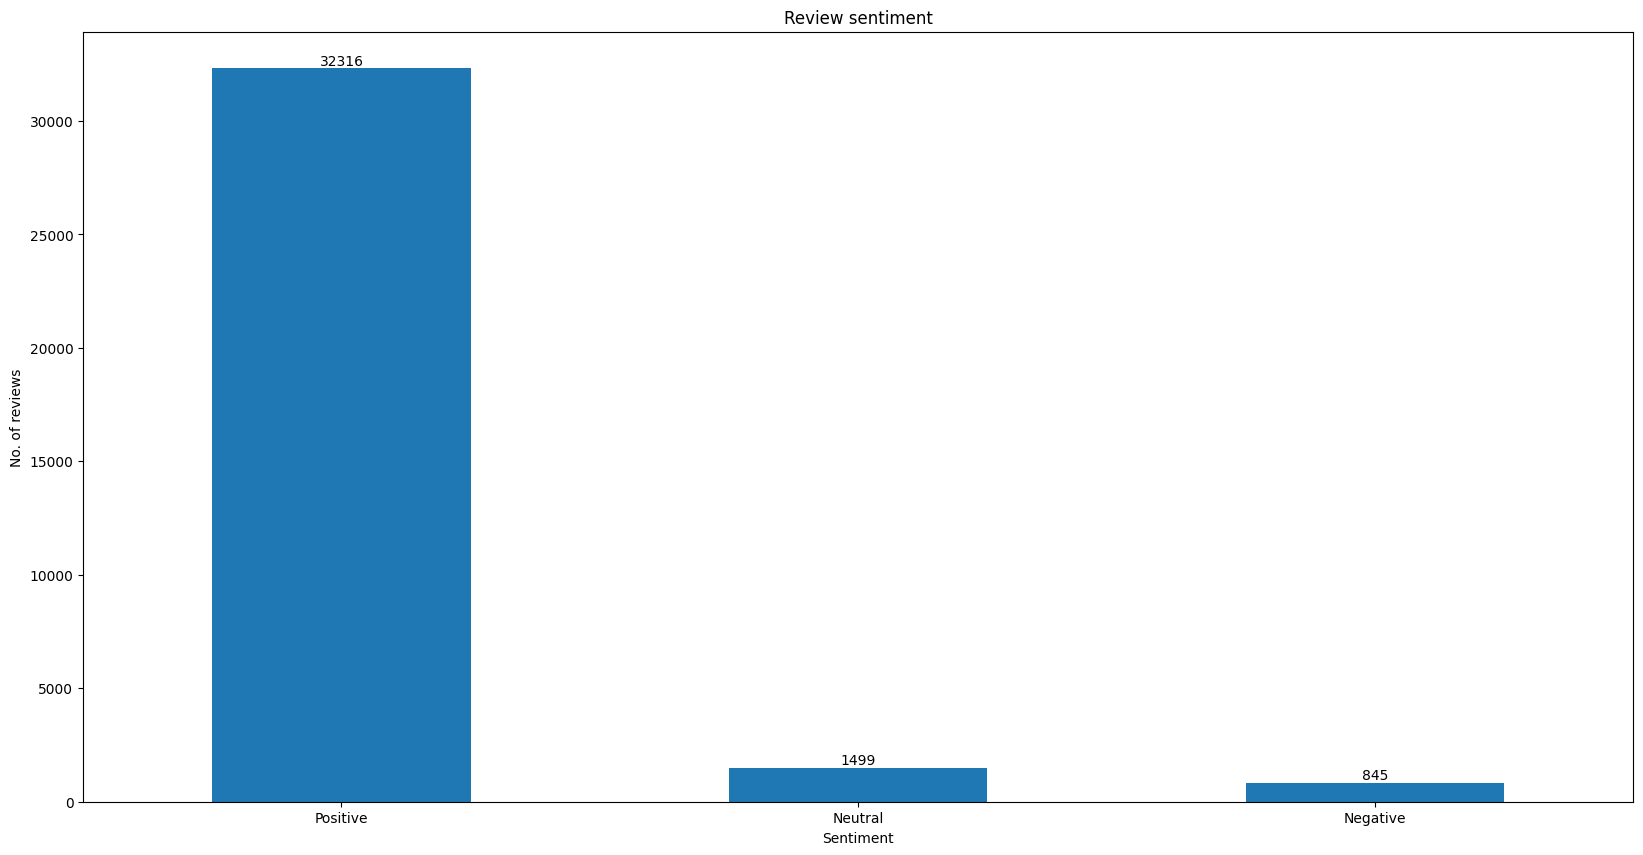

In [27]:
sentiment = df['sentiment'].value_counts()
x = sentiment.plot(kind='bar',title="Review sentiment",xlabel="Sentiment",ylabel="No. of reviews" ,figsize=(20,10))
plt.xticks(rotation=0)
x.bar_label(x.containers[0])

Review Text Analysis
Which words are most frequently used in the reviews.

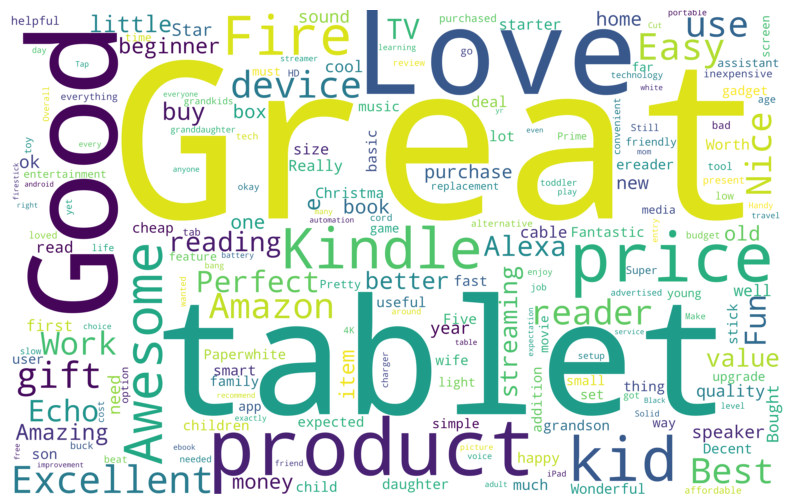

In [28]:
# wordcloud
# text = " ".join(text for text in df["reviews.text"])
text = " ".join(text for text in df["reviews.title"])
f = plt.figure(figsize=(10,7))
word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 8000, height = 5000).generate(text)
# saving the image
word_cloud.to_file('got.png')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most commonly used words in the review are : tablet , Great , Use , Love , Easy , Good , Amazon, etc.

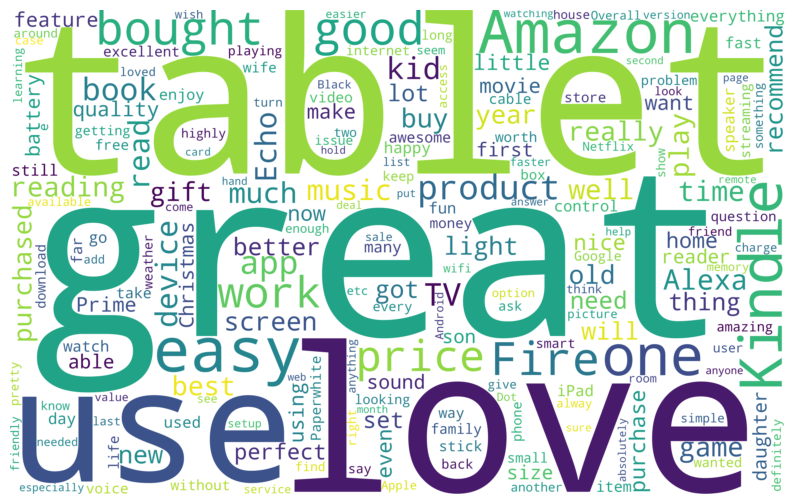

In [29]:
text = " ".join(text for text in df["reviews.text"])
# text = " ".join(text for text in df["reviews.title"])
f = plt.figure(figsize=(10,7))
word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 8000, height = 5000).generate(text)
# saving the image
word_cloud.to_file('got.png')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

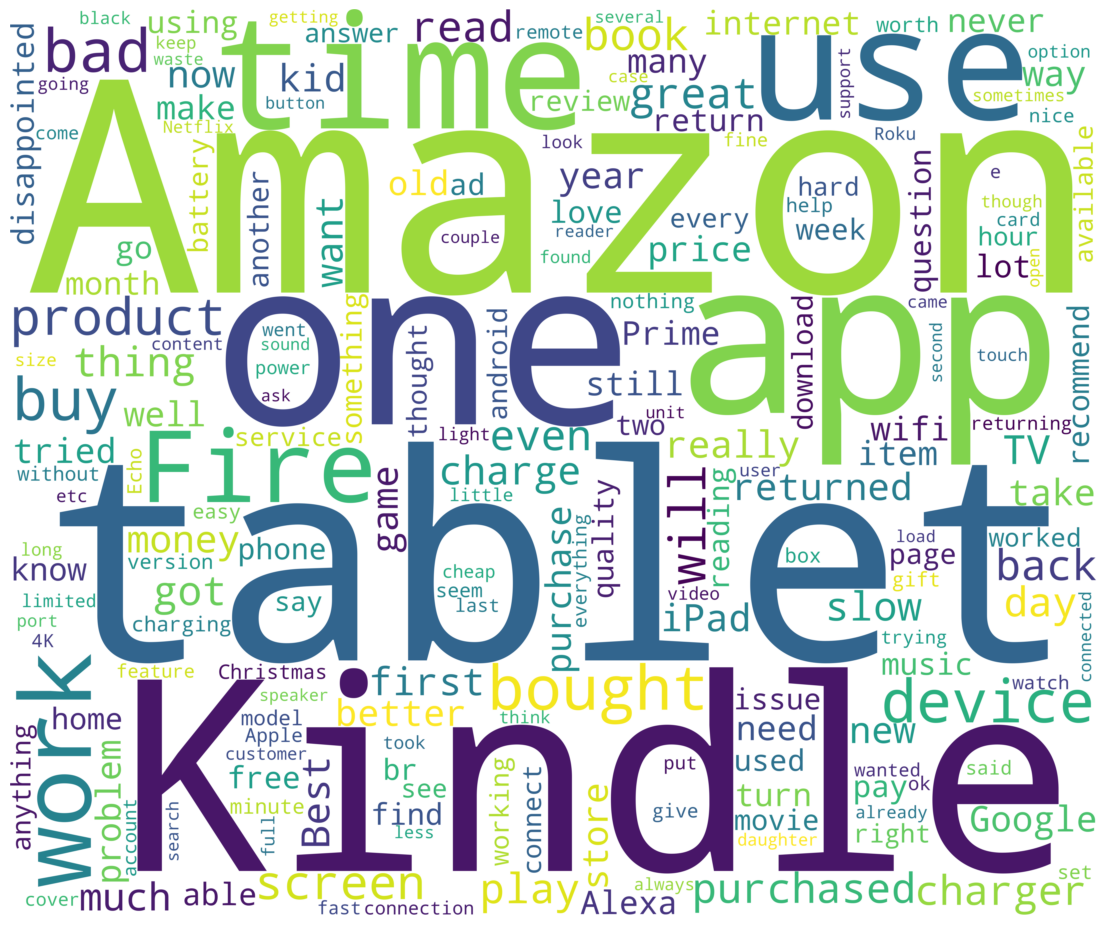

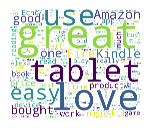

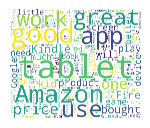

In [32]:
negative_comments = df[df["sentiment"]=='Negative']
positive_comments = df[df["sentiment"]=='Positive']
neutral_comments = df[df["sentiment"]=='Neutral']
# print(negative_comments)
f = plt.figure(figsize=(20,40))
text1 = " ".join(text for text in negative_comments["reviews.text"])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 6000, height = 5000).generate(text1)
# saving the image
# word_cloud.to_file('got.png')
plt.subplot(3,1,1)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()
text2 = " ".join(text for text in positive_comments["reviews.text"])
word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        width = 6000, height = 5000).generate(text2)
# saving the image
# word_cloud.to_file('got.png')
plt.subplot(3,1,3)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
text3 = " ".join(text for text in neutral_comments["reviews.text"])
word_cloud3 = WordCloud(collocations = False, background_color = 'white',
                        width = 6000, height = 5000).generate(text3)
# saving the image
# word_cloud.to_file('got.png')
plt.subplot(3,1,3)
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='reviews.numHelpful', ylabel='reviews.rating'>

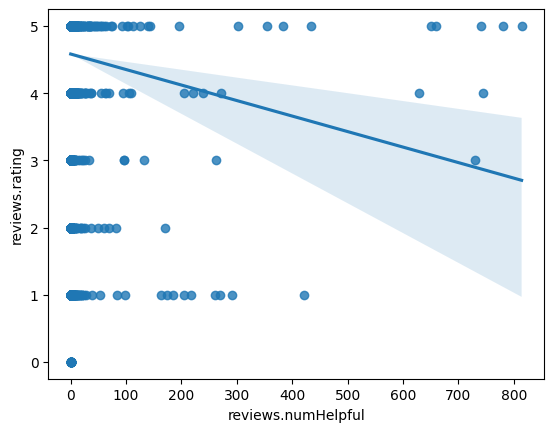

In [31]:
sns.regplot(x='reviews.numHelpful',y='reviews.rating',data=df)